# Process discriminator

In [1]:
import base

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import process_discriminator

## Generate paths

 We will generate Geometric Brownian Motions. We define three sets, `set1`, `set2` and  `set3`. `set1` and `set3` come from the same distribution and `set2` is not.

In [2]:
def generate(mu, sigma, n_points=100):
    """Generate GBM."""
    
    dt = 1 / np.sqrt(n_points)
    
    timeline = np.linspace(0, 1, n_points)
    bm = dt * np.r_[0., np.random.randn(n_points - 1).cumsum()]
    path = np.exp((mu - sigma ** 2 / 2.) * timeline + sigma * bm)
    
    return np.c_[timeline, path]    

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 11041.12it/s]


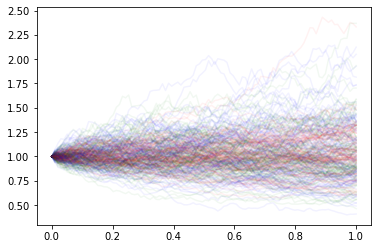

In [3]:
set1 = [generate(mu=0.02, sigma=0.3) for _ in tqdm(range(5000))]
set2 = [generate(mu=0.02, sigma=0.2) for _ in tqdm(range(5000))]
set3 = [generate(mu=0.02, sigma=0.3) for _ in tqdm(range(5000))]

for path1, path2, path3 in zip(set1[:100], set2[:100], set3[:100]):
    plt.plot(*path1.T, "b", alpha=0.05)
    plt.plot(*path2.T, "r", alpha=0.05)
    plt.plot(*path3.T, "g", alpha=0.05)

In [6]:
set1[0]

array([[0.        , 1.        ],
       [0.01010101, 0.9610809 ],
       [0.02020202, 1.01157121],
       [0.03030303, 0.97397161],
       [0.04040404, 0.95580771],
       [0.05050505, 0.97066543],
       [0.06060606, 0.9415127 ],
       [0.07070707, 0.94959933],
       [0.08080808, 0.92881811],
       [0.09090909, 0.93394947],
       [0.1010101 , 0.90039033],
       [0.11111111, 0.89247096],
       [0.12121212, 0.92721813],
       [0.13131313, 0.94690278],
       [0.14141414, 0.876422  ],
       [0.15151515, 0.8557573 ],
       [0.16161616, 0.82993636],
       [0.17171717, 0.7955587 ],
       [0.18181818, 0.78704611],
       [0.19191919, 0.80867164],
       [0.2020202 , 0.76930017],
       [0.21212121, 0.77885916],
       [0.22222222, 0.77735613],
       [0.23232323, 0.77171505],
       [0.24242424, 0.77751178],
       [0.25252525, 0.75702332],
       [0.26262626, 0.70557181],
       [0.27272727, 0.68907507],
       [0.28282828, 0.7351628 ],
       [0.29292929, 0.70885897],
       [0.

## Apply test

We will now apply the statistical test. We fix the confidence level to 99%.

In [4]:
result = process_discriminator.test(set1, set2, order=3, confidence_level=0.99)
print("Do set1 and set2 come from DIFFERENT distributions? {}".format(result))

Computing signatures of population 2: 100%|██████████| 5000/5000 [00:00<00:00, 8297.59it/s]


Do set1 and set2 come from DIFFERENT distributions? True


In [5]:
result = process_discriminator.test(set1, set3, order=3, confidence_level=0.99)
print("Do set1 and set3 come from DIFFERENT distributions? {}".format(result))

Computing signatures of population 2: 100%|██████████| 5000/5000 [00:00<00:00, 7299.65it/s]


Do set1 and set3 come from DIFFERENT distributions? False
